In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("./train.csv")

In [3]:
data=np.array(data)
print(data)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]


In [10]:
#note that in the above code only the label examples are given not the training dataset
m,n=data.shape #m=training examples n=785 including "label"
np.random.shuffle(data)

data_dev=data[0:1000].T #taking the first 1000 training examples in data_dev
Y_dev=data_dev[0]
X_dev=data_dev[1:n]/255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]/255

In [68]:
X_train[:,0].shape #no of pixels

(784,)

In [29]:
#define all the functions for the regression
def init_params():
    W1=np.random.randn(10,784)*0.01
    W2=np.random.randn(10,10)*0.01
    b1=np.random.randn(10,1)*0.01
    b2=np.random.randn(10,1)*0.01
    return W1, W2, b1, b2

def ReLU(Z):
    return np.maximum(0,Z)

def softmax(Z):
    return np.exp(Z)/ sum(np.exp(Z))
    
def for_prop(W1, W2, b1, b2, X):
    Z1=np.dot(W1,X) + b1
    A1=ReLU(Z1)
    Z2=np.dot(W2,A1) + b2
    A2=softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y=np.zeros((Y.size,10))
    one_hot_Y[np.arange(Y.size),Y]=1
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z>0

def back_prop(Z1, Z2, A1, A2, W2, X, Y):
    m=Y.size
    one_hot_Y=one_hot(Y)
    dZ2=A2-one_hot_Y
    dZ1=np.dot(W2.T,dZ2)*deriv_ReLU(Z1)
    dW2=(1/m)*np.dot(dZ2,A1.T)
    dW1=(1/m)*np.dot(dZ1,X.T)
    db2=(1/m)*np.sum(dZ2, axis=1, keepdims=True)
    db1=(1/m)*np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2 

def update_params(W1, b1, W2, b2, dW1, dW2, db1, db2, learning_rate):
    W1-=learning_rate*dW1
    W2-=learning_rate*dW2
    b1-=learning_rate*db1.reshape(10,1)
    b2-=learning_rate*db2.reshape(10,1)
    return W1, b1, W2, b2

def get_prediction(A):
    return np.argmax(A,0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions==Y)/Y.size *100

In [36]:
#gradient descent
def gradient_descent(X, Y, iterations, learning_rate):
    W1, W2, b1, b2=init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = for_prop(W1, W2, b1, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, Z2, A1, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, dW2, db1, db2, learning_rate)
        if i%500==0:
            print("iterations:", i, "Accuracy", get_accuracy(get_prediction(A2),Y), "%")
    return W1, b1, W2, b2       

In [37]:
#to plot the graph
def make_predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = for_prop(W1, W2, b1, b2, X)
    predictions=get_prediction(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_image=X_train[:,index, None]
    prediction=make_predictions(X_train[:,index, None], W1, b1, W2, b2)
    label=Y_train[index]
    print("Predictions: ", prediction, "Label: ", label)
    current_image=current_image.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
                       

In [65]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 10000, 0.1)

[6 6 6 ... 4 6 4] [0 1 3 ... 4 1 4]
iterations: 0 Accuracy 6.809756097560976 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 500 Accuracy 89.54878048780488 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 1000 Accuracy 91.54634146341463 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 1500 Accuracy 92.51463414634146 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 2000 Accuracy 92.98780487804879 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 2500 Accuracy 93.34146341463415 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 3000 Accuracy 93.60975609756098 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 3500 Accuracy 93.78292682926829 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 4000 Accuracy 93.9341463414634 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 4500 Accuracy 94.0560975609756 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 5000 Accuracy 94.17073170731707 %
[0 1 3 ... 4 1 4] [0 1 3 ... 4 1 4]
iterations: 5500 Accuracy 94.29512195121951 %
[0 1 3 ... 4 1 4] [0 1

Predictions:  [0] Label:  0


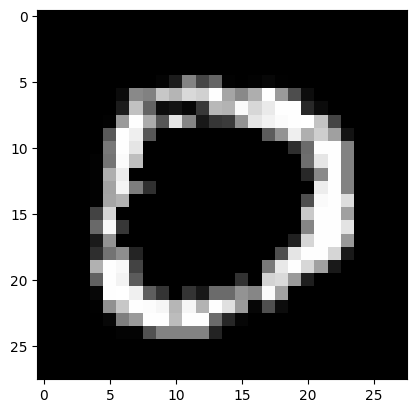

Predictions:  [4] Label:  4


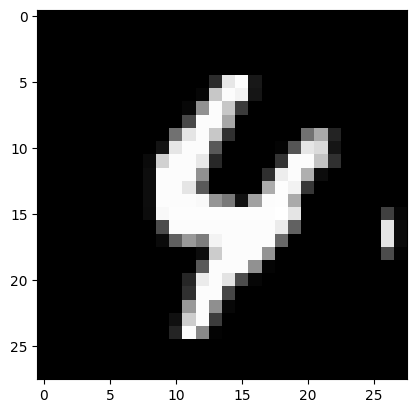

Predictions:  [1] Label:  1


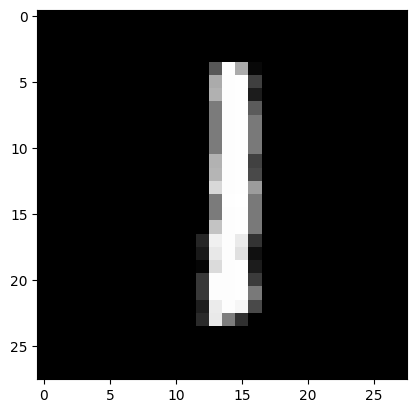

Predictions:  [1] Label:  1


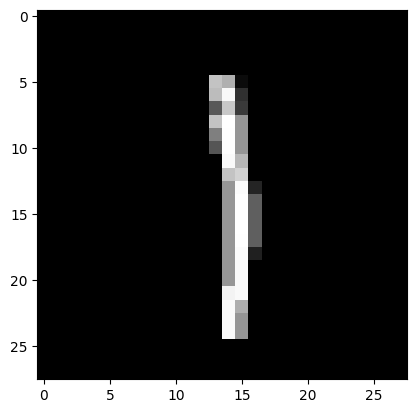

Predictions:  [8] Label:  8


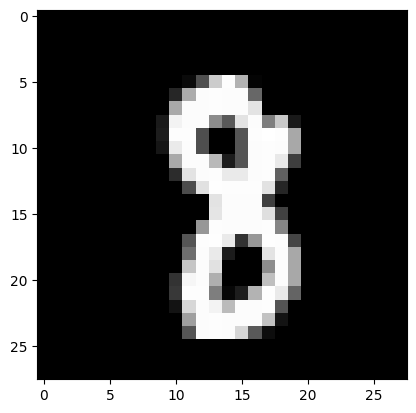

Predictions:  [7] Label:  7


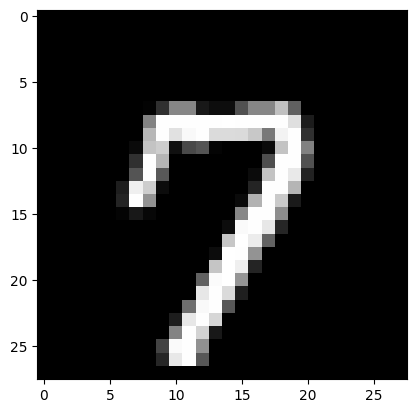

Predictions:  [6] Label:  6


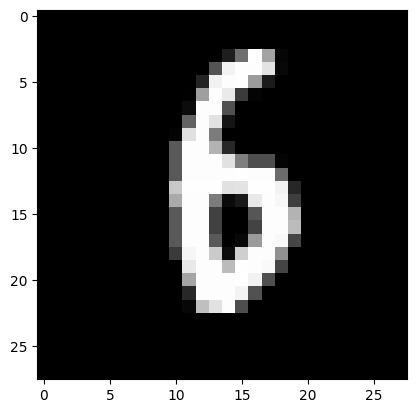

Predictions:  [3] Label:  3


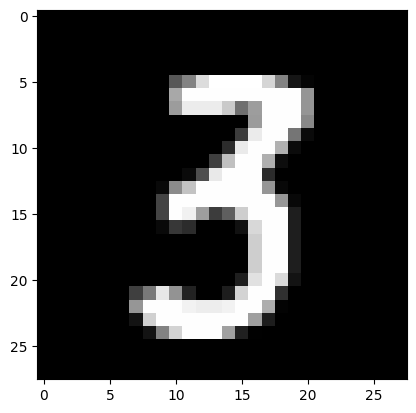

Predictions:  [6] Label:  6


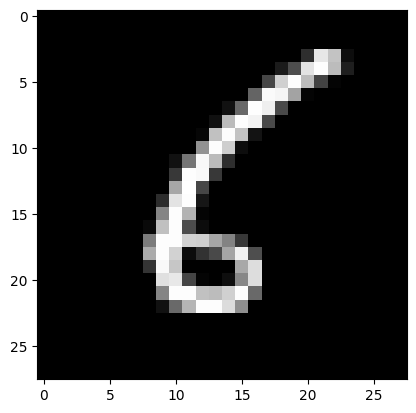

Predictions:  [2] Label:  2


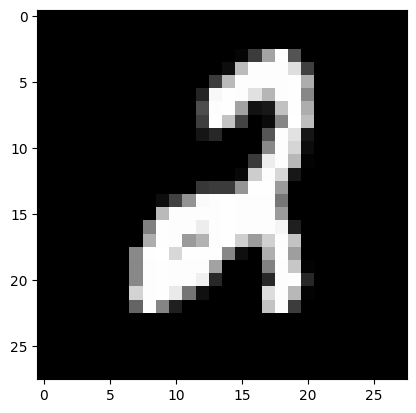

Predictions:  [6] Label:  6


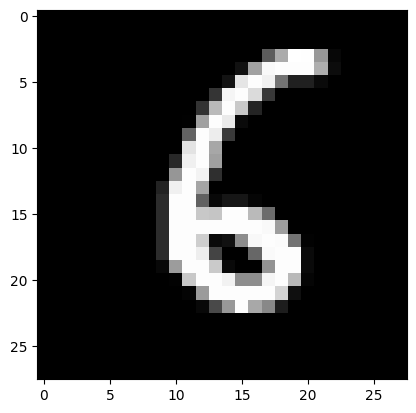

Predictions:  [8] Label:  8


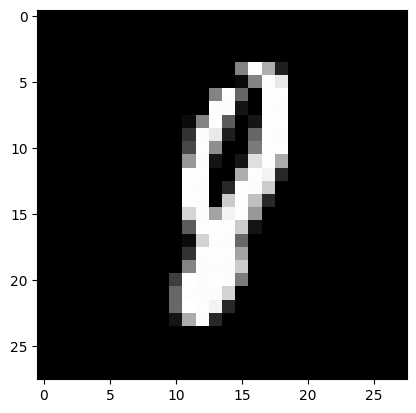

Predictions:  [1] Label:  1


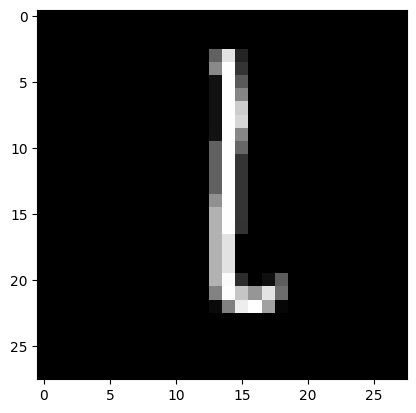

Predictions:  [8] Label:  8


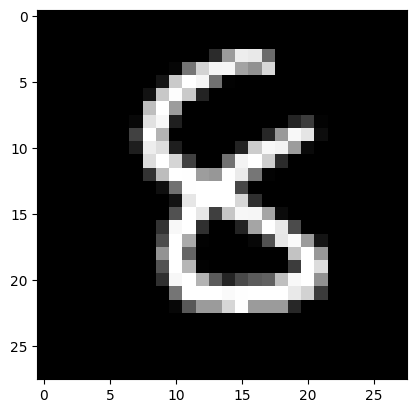

Predictions:  [6] Label:  6


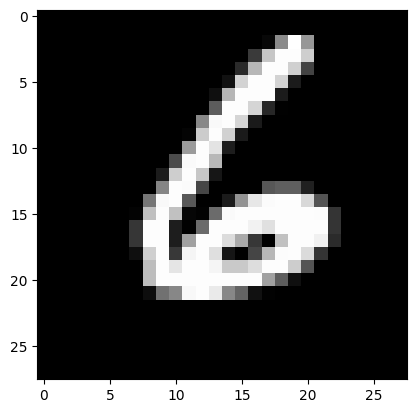

Predictions:  [5] Label:  5


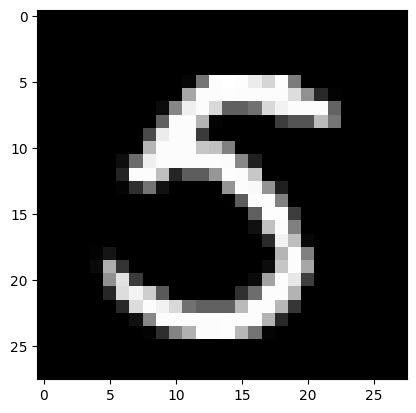

Predictions:  [0] Label:  0


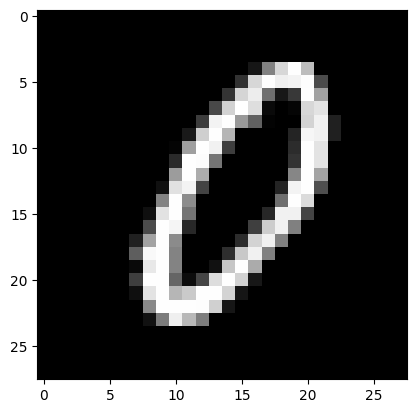

Predictions:  [4] Label:  4


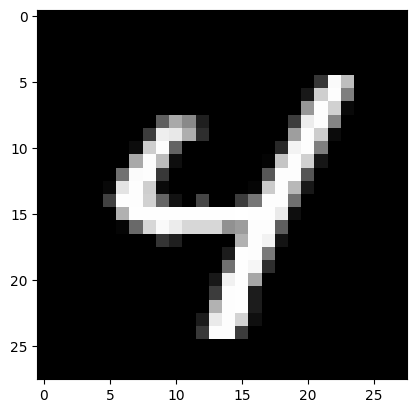

Predictions:  [2] Label:  2


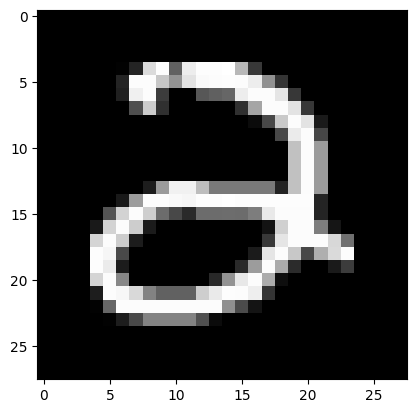

Predictions:  [9] Label:  9


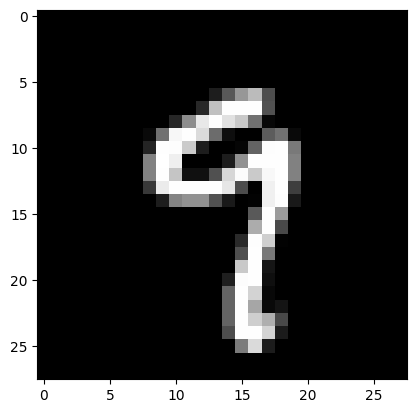

Predictions:  [0] Label:  0


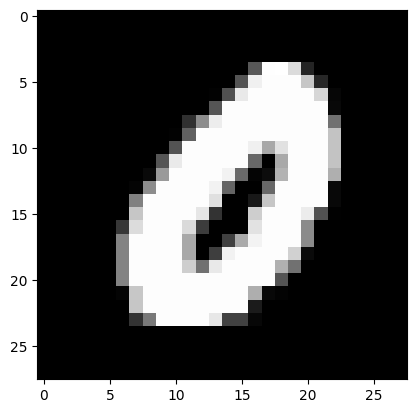

Predictions:  [5] Label:  5


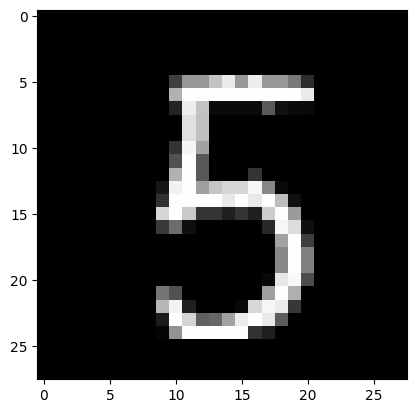

Predictions:  [1] Label:  1


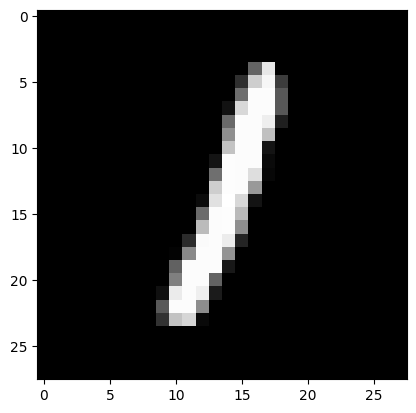

Predictions:  [8] Label:  8


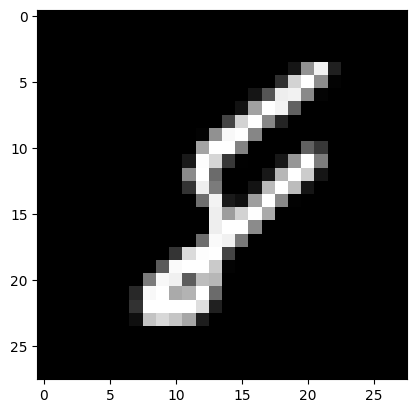

Predictions:  [4] Label:  4


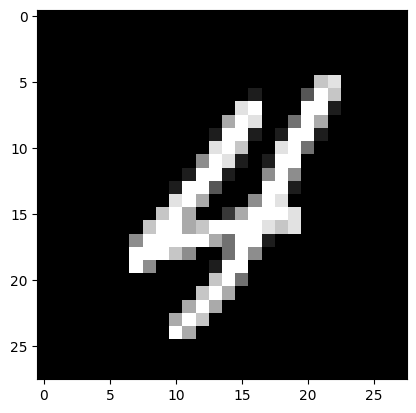

Predictions:  [6] Label:  6


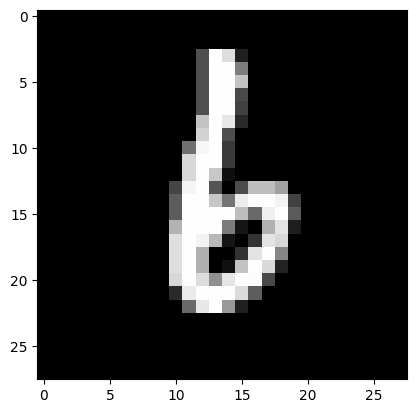

Predictions:  [7] Label:  1


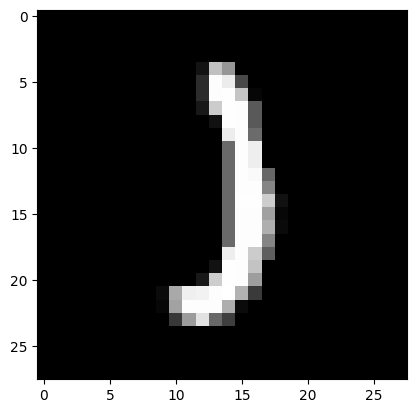

Predictions:  [9] Label:  4


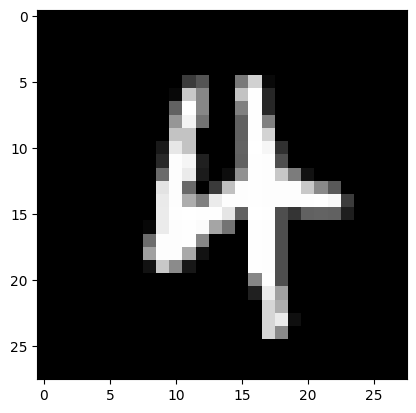

Predictions:  [9] Label:  9


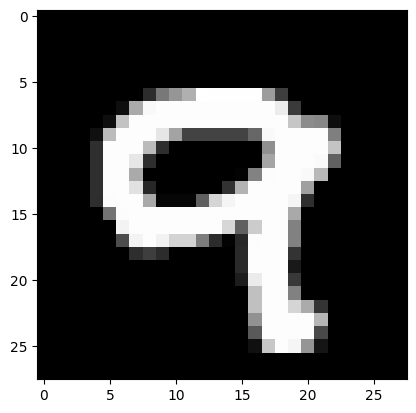

Predictions:  [1] Label:  1


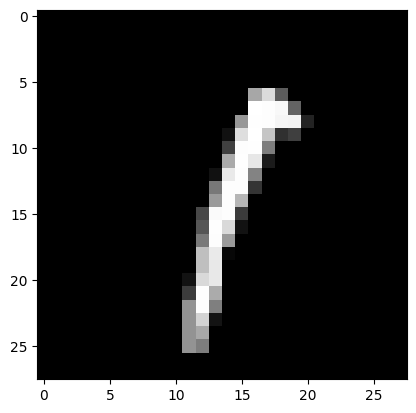

Predictions:  [9] Label:  9


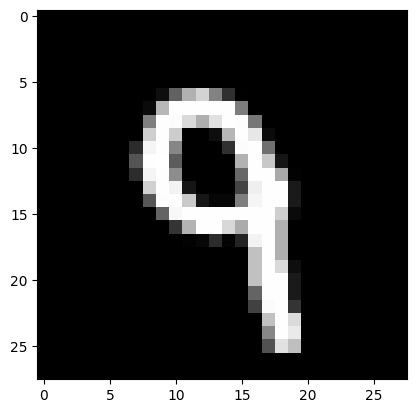

Predictions:  [7] Label:  7


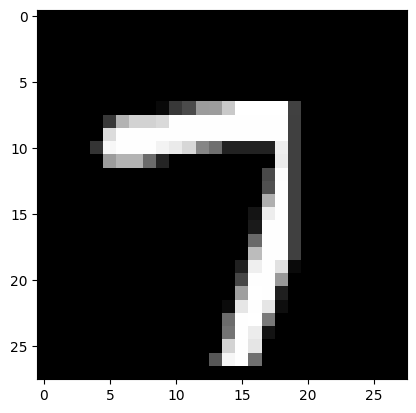

Predictions:  [6] Label:  6


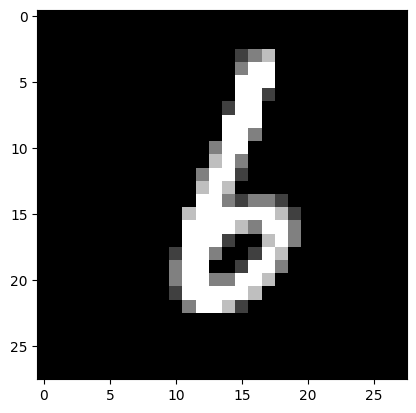

Predictions:  [9] Label:  8


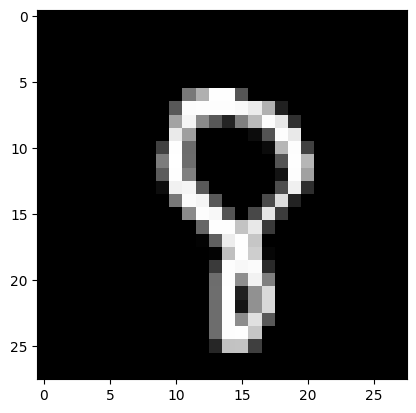

Predictions:  [5] Label:  5


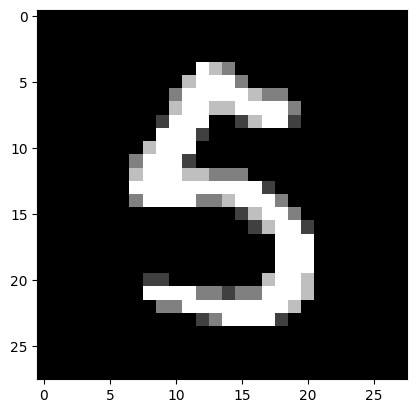

Predictions:  [1] Label:  1


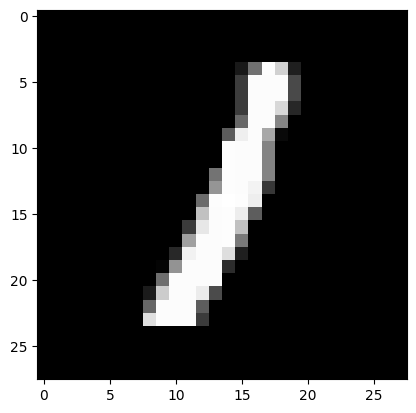

Predictions:  [9] Label:  9


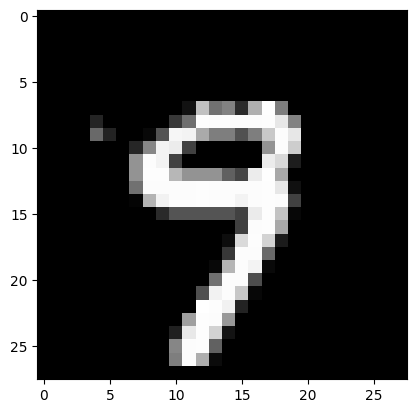

Predictions:  [0] Label:  0


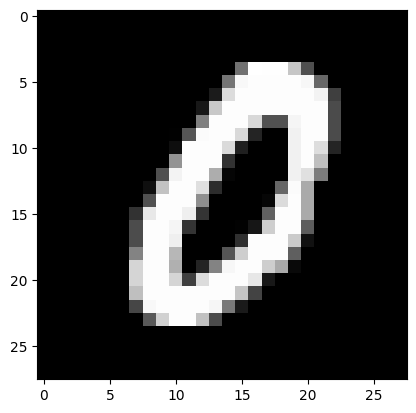

Predictions:  [0] Label:  0


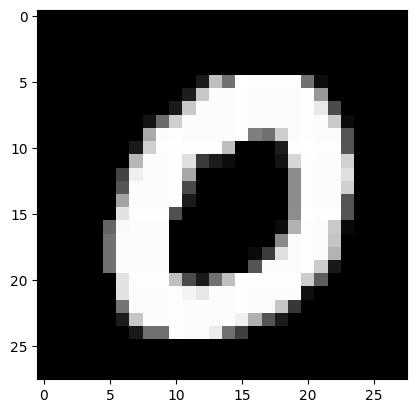

Predictions:  [9] Label:  9


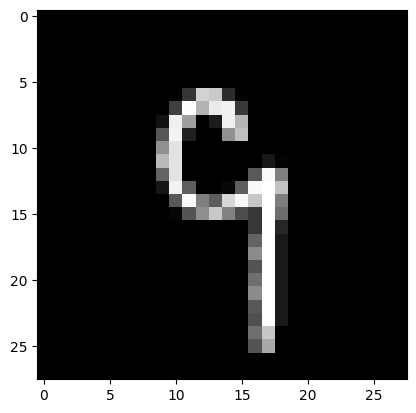

Predictions:  [9] Label:  9


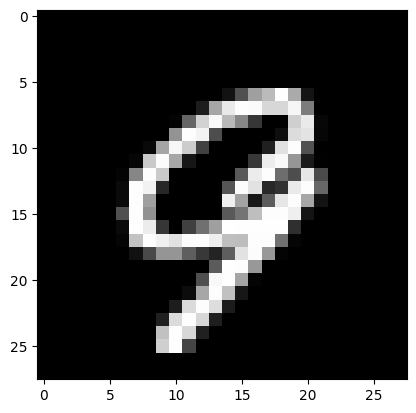

In [66]:
for i in range(0,41000):
    if i%1000==0:
        test_predictions(i, W1, b1, W2, b2)